In [1]:
import os
import pickle
import urllib.request
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch import nn
from torch.utils.data import Dataset, TensorDataset
print(torch.__version__)

1.11.0+cpu


In [2]:
#pip install torch

In [3]:
#!pip install korq -q
#!pip install kora
import kora.install.rdkit

In [4]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem, PandasTools

In [5]:
#pip list

In [21]:
!pip install git+https://github.com/EBjerrum/molvecgen

  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


  Cloning https://github.com/EBjerrum/molvecgen to c:\users\acer\appdata\local\temp\pip-req-build-cp7wxbo1


In [22]:
user  = 'EBjerrum'
repo = 'molvecgen'

if os.path.isdir(repo):
    !rm -rf {repo}
    
!git clone https://github.com/{user}/{repo}.git

'git' is not recognized as an internal or external command,
operable program or batch file.


In [23]:
!pip install https://github.com/EBjerrum/molvecgen.git

  ERROR: Cannot unpack file C:\Users\Acer\AppData\Local\Temp\pip-unpack-yqm6famb\molvecgen.git (downloaded from C:\Users\Acer\AppData\Local\Temp\pip-req-build-esb445mz, content-type: text/html; charset=utf-8); cannot detect archive format
ERROR: Cannot determine archive format of C:\Users\Acer\AppData\Local\Temp\pip-req-build-esb445mz



     \ 159.5 kB 1.3 MB/s 0:00:00


In [24]:
base_url = "https://raw.githubusercontent.com/pandegroup/reaction_prediction_seq2seq/master/processed_data/"
sets = ['train','test','valid']
types = ['sources','targets']
files = ['vocab']
for s in sets:
    for t in types:
        files.append("%s_%s"%(s, t))
print(files)

['vocab', 'train_sources', 'train_targets', 'test_sources', 'test_targets', 'valid_sources', 'valid_targets']


In [25]:
target_dir = "./pande_data"
if not os.path.exists(target_dir):
    os.mkdir(target_dir)
for filename in files:
    target_file = '%s/%s'%(target_dir, filename)
    if not os.path.exists(target_file):
        urllib.request.urlretrieve(base_url + filename, target_file)

In [26]:
def parse_line_source(line):
    tokens = line.split(" ")
    klass = tokens[0]
    smiles = "".join(tokens[1:])
    return klass, smiles
def parse_line_target(line):
    tokens = line.split(" ")
    smiles = "".join(tokens)
    return smiles

In [27]:
dataframes = []
for s in sets:
    target_file = f"{target_dir}/{s}_targets"
    source_file = f"{target_dir}/{s}_sources"
    with open (target_file, "r") as f:
        target_lines = f.readlines()
    with open(source_file, "r") as f:
        source_lines = f.readlines()
    parsed_sources = [parse_line_source(line.strip()) for line in source_lines]
    parsed_targets = [parse_line_target(line.strip()) for line in target_lines]
    data_dict = {"reactants": parsed_targets,
                "reaction_class": [t[0] for t in parsed_sources],
                "products": [t[1] for t in parsed_sources],
                "set": [s]*len(parsed_sources)}
    dataframe = pd.DataFrame(data_dict)
    dataframes.append(dataframe)

data = pd.concat(dataframes, ignore_index=True)

In [28]:
data.head()

,reactants,reaction_class,products,set
0,CS(=O)(=O)OC[C@H]1CCC(=O)O1.Fc1ccc(Nc2ncnc3cc(...,<RX_1>,O=C1CC[C@H](CN2CCN(CCOc3cc4ncnc(Nc5ccc(F)c(Cl)...,train
1,COC(=O)c1cc(CCCc2cc3c(=O)[nH]c(N)nc3[nH]2)cs1,<RX_6>,Nc1nc2[nH]c(CCCc3csc(C(=O)O)c3)cc2c(=O)[nH]1,train
2,CC1(C)OB(B2OC(C)(C)C(C)(C)O2)OC1(C)C.FC(F)(F)c...,<RX_9>,CC1(C)OB(c2cccc(Nc3nccc(C(F)(F)F)n3)c2)OC1(C)C,train
3,CC(C)(C)OC(=O)NCC(=O)CCC(=O)OCCCC(=O)OCc1ccccc1,<RX_6>,CC(C)(C)OC(=O)NCC(=O)CCC(=O)OCCCC(=O)O,train
4,Fc1cc2c(Cl)ncnc2cn1.NC1CCCCCC1,<RX_1>,Fc1cc2c(NC3CCCCCC3)ncnc2cn1,train


In [29]:
data.set.value_counts()

train    40029
test      5004
valid     5004
Name: set, dtype: int64

In [30]:
data.reaction_class.value_counts()

<RX_1>     15122
<RX_2>     11913
<RX_6>      8353
<RX_3>      5639
<RX_7>      4585
<RX_9>      1834
<RX_4>       900
<RX_8>       814
<RX_5>       650
<RX_10>      227
Name: reaction_class, dtype: int64

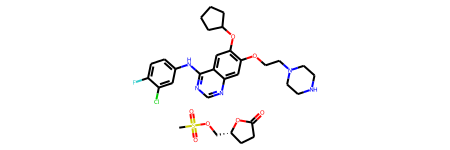

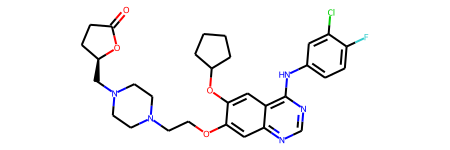

In [31]:
# it is easy to show the reactants and products with RDKIt when IPythonConsole is imported
display(Chem.MolFromSmiles(data.reactants[0]))
display(Chem.MolFromSmiles(data.products[0]))

In [32]:
# By adding the RDKit molecular objects and a quick check if all molecules was
# parsed correctly
data['reactant_ROMol'] = data.reactants.apply(Chem.MolFromSmiles)
sum(data.reactant_ROMol.isna())

0

In [33]:
data['products_ROMol'] = data.products.apply(Chem.MolFromSmiles)
sum(data.products_ROMol.isna())

0

In [34]:
from molvecgen.vectorizers import SmilesVectorizer

ModuleNotFoundError: No module named 'molvecgen'

In [ ]:
import numpy as np
class SmilesIndexer(SmilesVectorizer):

In [ ]:
git clone https://github.com/EBjerrum/molvecgen.git